In [1]:
import sys
from importlib import reload
import pandas as pd
import pickle
import seaborn as sns
from collections import Counter
import geopandas as gpd
import contextily as ctx

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clr

In [2]:
sys.path.insert(1, '../housing_elements/')

In [3]:
import analysis_utils as utils
import final_results


In [4]:
with open('../cities_with_sites_cache.pkl', 'rb') as f:
    cities_with_sites = pickle.load(f)

with open('../cities_with_permits_cache.pkl', 'rb') as f:
    cities_with_permits = pickle.load(f)

with open('../all_matches_cache.pkl', 'rb') as f:
    matches = pickle.load(f)

In [5]:
sclara = cities_with_sites['Santa Clara']
permits = cities_with_permits['Santa Clara']
matches = utils.get_matches_df(matches['Santa Clara'], utils.MatchingLogic("both", "25ft")) 

In [6]:
permits = permits.drop_duplicates('address')

In [7]:
sites = sclara[['geometry']].to_crs(epsg=3857)
permits = permits[['geometry']].to_crs(epsg=3857)

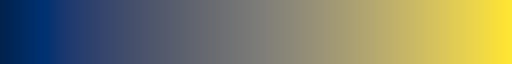

In [8]:
cm.get_cmap('cividis')

In [9]:
blue = cm.get_cmap('cividis')(0)
yellow = cm.get_cmap('cividis')(225)

In [10]:
cmap = clr.LinearSegmentedColormap.from_list("", 3*[(256/256, 215/256, 0/256)])

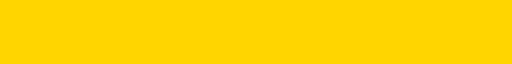

In [11]:
cmap

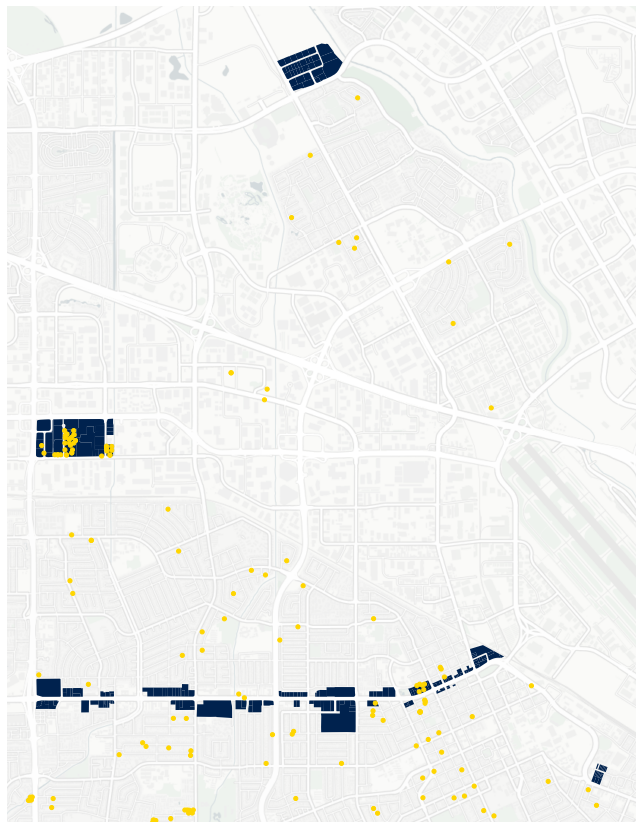

In [12]:
fig, ax = plt.subplots(figsize=(15, 15))
fig.patch.set_visible(False)
ax.axis('off')
sites.plot(ax=ax, legend=False, color=blue)
ctx.add_basemap(
    ax, 
    source=ctx.providers.CartoDB.PositronNoLabels, attribution=False)
permits.plot(ax=ax, cmap=cmap, markersize=17)

plt.savefig('../cover.png', dpi=500)